<a href="https://colab.research.google.com/github/kimdonggyufive/OpenReposit/blob/main/day2_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets),(test_data, test_targets)=boston_housing.load_data()

65536/57026 [==================================] - 0s 0us/step


In [4]:
train_data.shape, train_targets.shape

((404, 13), (404,))

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model=Sequential()
#784 = 28*28의 이미지를 넣는다.
model.add(Dense(64, activation='relu', input_shape=(13,)))
#model.add(Dense(64, activation='relu'))
#결과 값은 다음과 같다.
#softmax는 분류를 하는 것이다.
model.add(Dense(1))

In [6]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(train_data,train_targets, batch_size = 101, epochs = 100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 42.0153 - mae: 4.3925
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 41.8405 - mae: 4.3225
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 41.5755 - mae: 4.5651
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 41.4531 - mae: 4.4604
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 41.2430 - mae: 4.2623
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 40.7108 - mae: 4.4473
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 40.1911 - mae: 4.4333
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 40.1667 - mae: 4.2088
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 39.6586 - mae: 4.4179
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 39.4119 - mae: 4.3685
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - los

In [ ]:
test_loss, test_acc = model.evaluate(test_images,test_labels)
#seed값이 같음으로 시작 값은 같지만, 학습 방법에 w,b에 Random한 값을 넣어줌으로써 정확도 값은 지속적으로 변한다,
#따라서 정확한 값을 얻기 위해서는 계속 정확도가 높을 때까지 돌려보는 방법 밖에 없다.
print(f'loss={test_loss}, acc= {test_acc*100:.2f}%')

313/313 [==============================] - 2s 5ms/step - loss: 47.6399 - accuracy: 0.8334
loss=47.639949798583984, acc= 83.34%


In [ ]:
import random
#1~9999개 중 임의의 수가 들어감
r=random.randrange(len(test_labels))
r_images=test_images[r:r+1]
r_labels=test_labels[r:r+1]
#x에는 예측하고 싶은 값을 준다.
r_predict=model.predict(r_images)
print('P',np.argmax(r_predict), r_predict)
print('L',np.argmax(r_labels), r_labels)


P 0 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
L 0 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


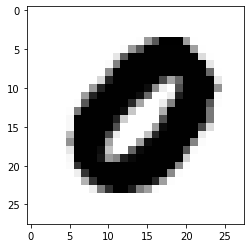

In [ ]:
import matplotlib.pyplot as plt
#이미지를 다시보기
#원본 이미지가 1차원으로 되어있으니 reshape으로 2차원으로 바꾼다.
plt.imshow(r_images.reshape(28,28),cmap=plt.cm.binary)